In [1]:
import numpy as np
import pandas as pd


## 1. Cálculo pelo processo convencional

Os dados da torre fornecidos para o problema são:
\begin{align}
\gamma_{concreto} &= 2500 kg/m^3\\
F_{ck} &= 30MPa
\end{align}
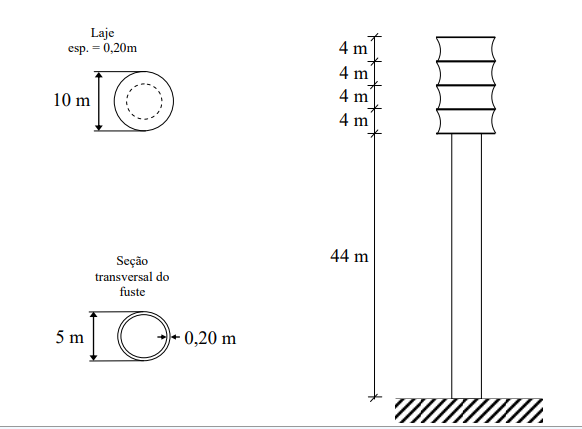


In [2]:
A_F = np.pi*(5**2 - 4.6**2)/4
A_L = np.pi*(10**2)/4

mi_F = A_F * 2500

m_L = 5* A_L *0.2*2500

print(" Massa por comprimento do fuste:{0:5.3f}kg/m.".format(mi_F))
print(" Massa das 5 lajes :{0:5.3f}kg.".format(m_L))


 Massa por comprimento do fuste:7539.822kg/m.
 Massa das 5 lajes :196349.541kg.


As características do vento estão expostas abaixo:


In [3]:
Vo = 46    ## Velocidade básica do vento
S1 = 1.0   ## Fator topográfico
S3 = 1.0   ## Fator estatístico

## Para categoria III e classe C.
b = 0.93
p = 0.115
################################

z = [4,12.5,21.5,30.5,39.5,46,50,54,58] ## discretização da altura da torre
S2 = np.zeros(len(z))
for i in range (len(z)):
    S2[i] = b*0.95*(z[i]/10)**p
    
Vk = S1*S2*S3*Vo ## Velocidade característica em cada altura



Para o cálculo dos esforços que atuarão na torre, é necessário a definição dos coeficientes de arrasto $C_a$( Tabela 10 da NBR 6123/88):

In [4]:
C_F = 0.5 ## Coeficiente de arrasto do fuste
C_K = 0.5 ## Coeficiente de arrasto do Kevlar
Ca = np.ones(9)* C_F

O cálculo da pressão dinâmica e da força de arrasto serão calculados, respectivamente, pelas seguintes equações:


$${q} = 0.613 * V_k^2 \\$$
$$ F_a = C_a * q * A $$



In [5]:
q = 0.613*Vk**2
A = [41.25,45,45,45,45,40,40,40,40]
F1 = Ca*q*A
M1 = F1*z
data = {'Vk (m/s)':Vk[::-1],'S2': S2[::-1],'A (m^2)':A[::-1],
        'q (kPa)':q[::-1]/1000,'Ca':Ca[::-1],'F (kN)':F1[::-1]/1000,'M (kN.m)':M1[::-1]/1000}

Plan = pd.DataFrame( data = data,
                   index = z[::-1])
print(Plan)
   

       Vk (m/s)        S2  A (m^2)   q (kPa)   Ca     F (kN)     M (kN.m)
58.0  49.746050  1.081436    40.00  1.516972  0.5  30.339448  1759.688004
54.0  49.338923  1.072585    40.00  1.492244  0.5  29.844878  1611.623405
50.0  48.904175  1.063134    40.00  1.466062  0.5  29.321241  1466.062032
46.0  48.437480  1.052989    40.00  1.438214  0.5  28.764282  1323.156986
39.5  47.596284  1.034702    45.00  1.388694  0.5  31.245616  1234.201845
30.5  46.201797  1.004387    45.00  1.308514  0.5  29.441554   897.967391
21.5  44.380767  0.964799    45.00  1.207397  0.5  27.166432   584.078297
12.5  41.697406  0.906465    45.00  1.065807  0.5  23.980656   299.758205
4.0   36.576427  0.795140    41.25  0.820093  0.5  16.914416    67.657663


O somatório dos esforços são:


In [6]:
print('Esforço cortante ={0:5.3f}N'.format(np.sum(F1)))
print('Mommento fletor ={0:5.3f}N.m'.format(np.sum(M1)))

Esforço cortante =247018.524N
Mommento fletor =9244193.828N.m


## 2. Solução pelo capítulo 9 da NBR6123/88

### 1. Método simplificado
Para a velocidade média do vento, utiliza-se a seguinte expressão:
$$ V_k = 0.69*V_o*S1*S2 $$
Para uma chaminé de concreto com razão uniforme (Tabela 19), tem-se:
$$ \\ expoente\,da\,Forma \,modal = 1.7\\ $$
$$Razão\, de \,amortecimento = 0.010 \\$$
$$Frequência\, fundamental= 1.11 Hz$$
Já a pressão dinâmica pode ser expressa por:

$$ q = \overline{q_o}*b^2 \left[ \left( \frac{z}{z_r} \right) ^{2p}+\left(\frac{h}{z_r} \right) ^{p}*\left(
\frac{z}{h} \right) ^{\gamma} *\frac{1+2*\gamma}{1+\gamma+p}*\xi\right]$$

$$ \overline{q_o} =  0.613 * V_k^2 $$

Pela interpolação linear da Figura 16, $ \xi = 1.50$ e pela tabela 20, tem-se que $ b = 0.86$ e  $p = 0.185$


In [7]:
Vk = S1*0.69*S3*Vo
q = 0.613*Vk**2
q_d = np.zeros(9)
for n in range (9):
    
    q_d[n] = q *0.86**2 *((z[n]/10)**(2*0.185) + (60/10)**0.185 *(z[n]/60)**1.7 * (1+2*1.7)*1.5/(1+1.7+0.185))
    
F2 = Ca*q_d*A
M2 = F2*z

Montando agora a tabela para o cálculo dos esforços:


In [8]:
data = {'Vk (m/s)':Vk,'A (m^2)':A[::-1],
        'q (kPa)':q_d[::-1]/1000,'Ca':Ca[::-1],'F (kN)':F2[::-1]/1000,'M (kN.m)':M2[::-1]/1000}

Plan = pd.DataFrame( data = data,
                   index = z[::-1])
print(Plan)

      Vk (m/s)  A (m^2)   q (kPa)   Ca     F (kN)     M (kN.m)
58.0     31.74    40.00  2.249300  0.5  44.986000  2609.188001
54.0     31.74    40.00  2.069284  0.5  41.385671  2234.826246
50.0     31.74    40.00  1.896122  0.5  37.922432  1896.121593
46.0     31.74    40.00  1.729854  0.5  34.597071  1591.465257
39.5     31.74    45.00  1.474428  0.5  33.174635  1310.398098
30.5     31.74    45.00  1.150786  0.5  25.892690   789.727054
21.5     31.74    45.00  0.860562  0.5  19.362651   416.296998
12.5     31.74    45.00  0.597191  0.5  13.436809   167.960106
4.0      31.74    41.25  0.339989  0.5   7.012274    28.049095


In [9]:
print('Esforço cortante ={0:5.3f}N'.format(np.sum(F2)))
print('Mommento fletor ={0:5.3f}N.m'.format(np.sum(M2)))

Esforço cortante =257770.233N
Mommento fletor =11044032.447N.m


### 2. Método discreto

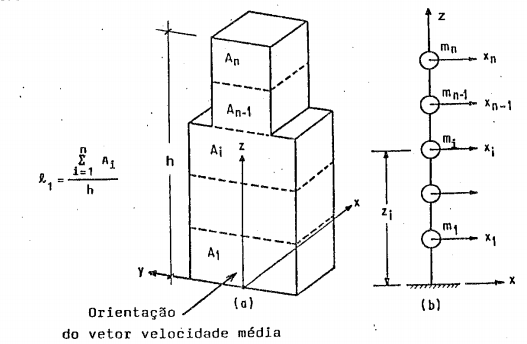
O capítulo 9 da norma estabelece o seguinte roteiro para a análise dinâmica
$$ x_i = \left(\frac{z_i}{h}\right)^\gamma\\ $$
$$ X_i = \overline{X_i} + \hat{X_i}\\ $$
$$ \overline{X_i} = \overline{q_o}*b^2*C_{ai}*A_i*\left(\frac{z_i}{z_r}\right)^{2p}\\ $$
$$ \hat{x_i} = FH *\phi_i* x_i\\ $$
$$ \phi_i = \frac{m_i}{m_o}\\ $$
$$ FH = \overline{q_o}*b^2*C_i*A_O* \frac{\sum_{n=1}^{n}\beta_i * x_i}{\sum_{n=1}^{n}\phi_i * x_i^2}*\xi\\ $$
$$ A_o = \sum A_i \\ $$
$$ m_o = \sum m_i \\ $$
$$ \beta_i = C_{ai} * \frac{A_i}{A_o} \left( \frac{z_i}{z_r}\right)^p $$

Onde $x_i$ é a forma modal, $X_i$ é a velocidade instantânea do vento, $\overline{X_i}$ é a velocidade média e $\hat{X_i}$ é a velocidade flutuante.

In [10]:
xi = np.zeros(9)
Xi_m = np.zeros(9)
beta =np.zeros(9)
mi = [24543.75, 34361.25, 35343,35343, 31346, 89559.5, 55779.3,55779.3, 75814.95]
phi = np.zeros(9)

for i in range(9):
    
    xi[i] = (z[i]/60)**1.7
    beta[i] = 0.5* A[i]/sum(A)*(z[i]/10)**0.185
    Xi_m[i] = q *0.86**2 * 0.5 * A[i] * (z[i]/10)**(2*0.185)
    phi[i] = mi[i]/sum(mi)



FH = q * 0.86**2 * 0.5 * np.sum(A)*np.sum(beta*xi)/sum(phi*xi**2) * 1.5

xi_f = FH * phi * xi
Xi = Xi_m + xi_f
M3 = (Xi)*z

data = {'A (m^2)':A[::-1],'m(kg)':mi[::-1],'beta':beta[::-1],
        'phi':phi[::-1],'x': xi[::-1],'FH':FH,'X médio (kN)':Xi_m[::-1]/1000,
        'x_f (kN)':xi_f[::-1]/1000,'Xi (kN)':Xi[::-1]/1000,'M (kN.m)':M3[::-1]/1000}

Plan = pd.DataFrame( data = data,
                   index = z[::-1])
print(Plan)



      A (m^2)     m(kg)      beta       phi         x            FH  \
58.0    40.00  75814.95  0.072620  0.173145  0.943997  93106.752898   
54.0    40.00  55779.30  0.071666  0.127388  0.836012  93106.752898   
50.0    40.00  55779.30  0.070653  0.127388  0.733486  93106.752898   
46.0    40.00  89559.50  0.069571  0.204534  0.636548  93106.752898   
39.5    45.00  31346.00  0.076093  0.071587  0.491313  93106.752898   
30.5    45.00  35343.00  0.072538  0.080716  0.316557  93106.752898   
21.5    45.00  35343.00  0.067994  0.080716  0.174698  93106.752898   
12.5    45.00  34361.25  0.061504  0.078474  0.069485  93106.752898   
4.0     41.25  24543.75  0.045663  0.056053  0.010015  93106.752898   

      X médio (kN)   x_f (kN)    Xi (kN)     M (kN.m)  
58.0     17.505301  15.218129  32.723430  1897.958912  
54.0     17.048529   9.915652  26.964181  1456.065753  
50.0     16.569909   8.699632  25.269541  1263.477041  
46.0     16.066512  12.122126  28.188638  1296.677363  
39.5     

Portanto, os esforços na base são:

In [11]:
print('Esforço cortante ={0:5.3f}N'.format(np.sum(Xi)))
print('Mommento fletor ={0:5.3f}N.m'.format(np.sum(M3)))

Esforço cortante =184796.132N
Mommento fletor =7758874.472N.m


Comparando os valores obtidos por cada método disponível na NBR 6123\88, monta-se a seguinte tabela:

In [12]:
data =[np.sum(F1)/1000,np.sum(M1)/1000,np.sum(F2)/1000,np.sum(M2)/1000,np.sum(Xi)/1000,np.sum(M3)/1000]
comp = pd.DataFrame( data = data,
                   index = ['Força convencional','Momento convecional','Força simplificada',
                            'Momento simplificado',
                             'Força discreta','Momento discreto'],
                   columns = ['Valores'])
print(comp)

                           Valores
Força convencional      247.018524
Momento convecional    9244.193828
Força simplificada      257.770233
Momento simplificado  11044.032447
Força discreta          184.796132
Momento discreto       7758.874472


## 3. Desprendimento de vórtices pela norma canadense
A principio, deve-se calcular a velocidade crítica, que consiste na velocidade do vento em que a estrutura entrará em ressonância com as forças transversais.

$$ V_{cr} = \frac{1}{S_t}*f*d $$

Onde $S_t$ é o número de Strouhal, que pode apresentar os seguintes valores:

$$ S_t = 0.2,\, 10^3 \leq R_e \leq 2 *10^6$$
$$ S_t = 0.28,\, R_e \geq 2 *10^6$$

O cálculo das características da torre, como módulo de elasticidade, momento de inércia e Rigidez estão apresentados abaixo:

In [13]:
E = 6600*(30+3.5)**0.5
I = 0.25 * np.pi * (2.5**4 - 2.3**4)
K = 3* E*I/(60**3)*10**6
print(' Módulo de elasticidade:     {0:5.3f}MPa'.format(E),'\n',
      'Momento de inércia:         {0:5.3f}m^4'.format(I),'\n',
      'Rigidez à flexão:           {0:5.3f}N/m'.format(K))

 Módulo de elasticidade:     38200.262MPa 
 Momento de inércia:         8.701m^4 
 Rigidez à flexão:           4616371.656N/m


Calculando, agora, as frequências naturais da torre e da massa concentrada (Lajes) em cima dela, por meio das equações:
    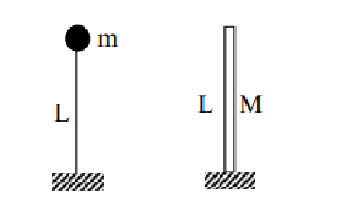
    Para a massa concentrada
$$f = \frac{1}{2\pi}\sqrt{\frac{K}{m}}$$ 

 Para a massa Distribuída
$$f = \frac{3.52}{2\pi}\sqrt{\frac{EI}{ML^4}}$$ 

Tendo estes dois valores, é possível estimar a frequência natural da torre junto da massa, por meio da equação:

$$ \frac{1}{f_n^2} = \frac{1}{f_1^2}+\frac{1}{f_2^2}$$


In [14]:
f1 = 1/(2*np.pi)*np.sqrt(K/m_L)
f2 = 3.52/(2*np.pi)*np.sqrt(E*10**6*I/(mi_F*60**4))
inv_fn = 1/(f1**2) + 1/(f2**2)
fn = (1/inv_fn)**0.5
print(' Frequência das lajes:      {0:5.3f}Hz'.format(f1),'\n',
      'Freqência do fuste:        {0:5.3f}Hz'.format(f2),'\n',
      'Frequência da torre:       {0:5.3f}Hz'.format(fn))


 Frequência das lajes:      0.772Hz 
 Freqência do fuste:        1.033Hz 
 Frequência da torre:       0.618Hz


Com o valor do número de Reynolds obtido nos itens anteriores, o número de Strouhal é o Seguinte:
$$ S_t = 0.2$$

Calculando agora a velocidade crítica para os dois diâmetros da torre:



In [15]:
v1 = 1/0.2 * fn * 5
v2 = 1/0.2 * fn * 10
print(' Velocidade crítica no fuste:         {0:5.3f}m/s'.format(v1),'\n',
      'Velocidade crítica no Kevlar:        {0:5.3f}m/s'.format(v2))

 Velocidade crítica no fuste:         15.457m/s 
 Velocidade crítica no Kevlar:        30.915m/s


Como a velocidade de projeto é maior que as velocidades críticas, pode ocorrer desprendimento de vórtices.

Os efeitos dinâmicos do desprendimento de vórtices podem ser aproximados por uma força estática lateral, atuando no terço
superior, aplicada no ponto de máximo deslocamento da forma modal considerada. A força estática equivalente por unidade de altura, FL, é dada por:

$$ F_L = \frac{C1}{\sqrt{\lambda}\sqrt{\beta- C_2 \frac{\rho D^2}{M}}}q_HD $$

Onde $\beta$ é o amortecimento em razão do crítico (0.010), $\lambda$ é a relação H/D, H é a altura da estrutura, $q_H$ é a pressão dinâmica correspondente a velocidade crítica( $q_H= 0.6*V_C^2$), M é a massa por unidade de altura do terço superior e $\rho$ é a densidade do ar(1.2 kg/m^3). Para a maioria dos casos:

$$C_1 = \frac{3\sqrt{\lambda}}{4}$$



Os cálculos abaixo são referentes a determinação da força transversal equivalente que atuará na estrutura.

In [19]:
rho = 1.2
lam = 60/5
C1 = 3*lam**0.5/4
C2 = 0.6


M_3 = ((60*mi_F)/3 + m_L)/(60/3)


qh1 = 0.6 * v1**2
qh2 = 0.6 * v2**2

FL1 = C1/((lam**0.5) * (0.01-C2*1.2*5**2/M_3)**0.5) * qh1 *5
FL2 = C1/((lam**0.5) * (0.01- C2*1.2*10**2/M_3)**0.5) * qh2 *10

print('  λ:                          {0:5.3f}'.format(lam),'\n',
      ' C1:                          {0:5.3f}'.format(C1),'\n',
      ' C2:                          {0:5.3f}'.format(C2),'\n',
      ' Massa do terço final:        {0:5.3f}kg/m'.format(M_3),'\n',
      ' Pressão dinâmica no Fuste:   {0:5.3f}N/m²'.format(qh1),'\n',
      ' Pressão dinâmica no Kevlar:  {0:5.3f}N/m²'.format(qh2),'\n',
      ' Força lateral no fuste:      {0:5.3f}kN/m'.format(FL1/1000),'\n',
      ' Força lateral no Kevlar:     {0:5.3f}kN/m'.format(FL2/1000))



  λ:                          12.000 
  C1:                          2.598 
  C2:                          0.600 
  Massa do terço final:        17357.299kg/m 
  Pressão dinâmica no Fuste:   143.356N/m² 
  Pressão dinâmica no Kevlar:  573.425N/m² 
  Força lateral no fuste:      5.678kN/m 
  Força lateral no Kevlar:     56.220kN/m


Se a seguinte relação for satisfeita, não haverá  oscilações acima de um diâmetro:
$$ \beta < C2\frac{\rho D^2}{M} $$


In [17]:
beta = 0.01
X1 = C2*rho*5**2/M_3
X2 = C2*rho*10**2/M_3

print(' beta:         {0:5.3f}'.format(beta),'\n',
      'Fuste:        {0:5.7f}'.format(X1),'\n',
      'Kevlar:       {0:5.7f}'.format(X2))


 beta:         0.010 
 Fuste:        0.0010370 
 Kevlar:       0.0041481


Portanto, não ocorrerá deslocamentos superiores a um diâmetro.

O cálculo dos esforços na base estão expostos a seguir:

In [18]:
V1 = FL1 * 60
V2 = FL2 * 16
V = V1 + V2

M = V * 50

print(' Força adicional na base:                {0:5.3f}kN'.format(V/1000),'\n',
      'Momento fletor adicional na base:        {0:5.3f}kN.m'.format(M/1000))


 Força adicional na base:                1240.218kN 
 Momento fletor adicional na base:        62010.905kN.m
